# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Problem Statement

# 2. Data Gathering

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.shape

(150, 6)

In [4]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris_df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 3. Exploratory Data Analysis

In [7]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris_df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

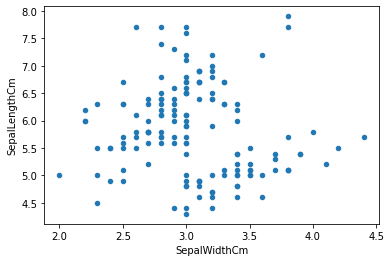

In [61]:
iris_df.plot(x = 'SepalWidthCm', y = 'SepalLengthCm', kind = 'scatter' )

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

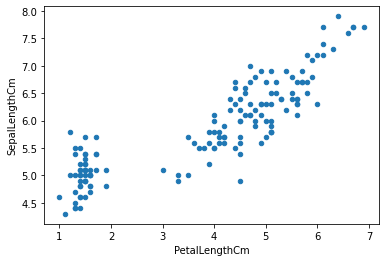

In [11]:
iris_df.plot(x = 'PetalLengthCm', y = 'SepalLengthCm', kind = 'scatter')

<Figure size 2160x2160 with 0 Axes>

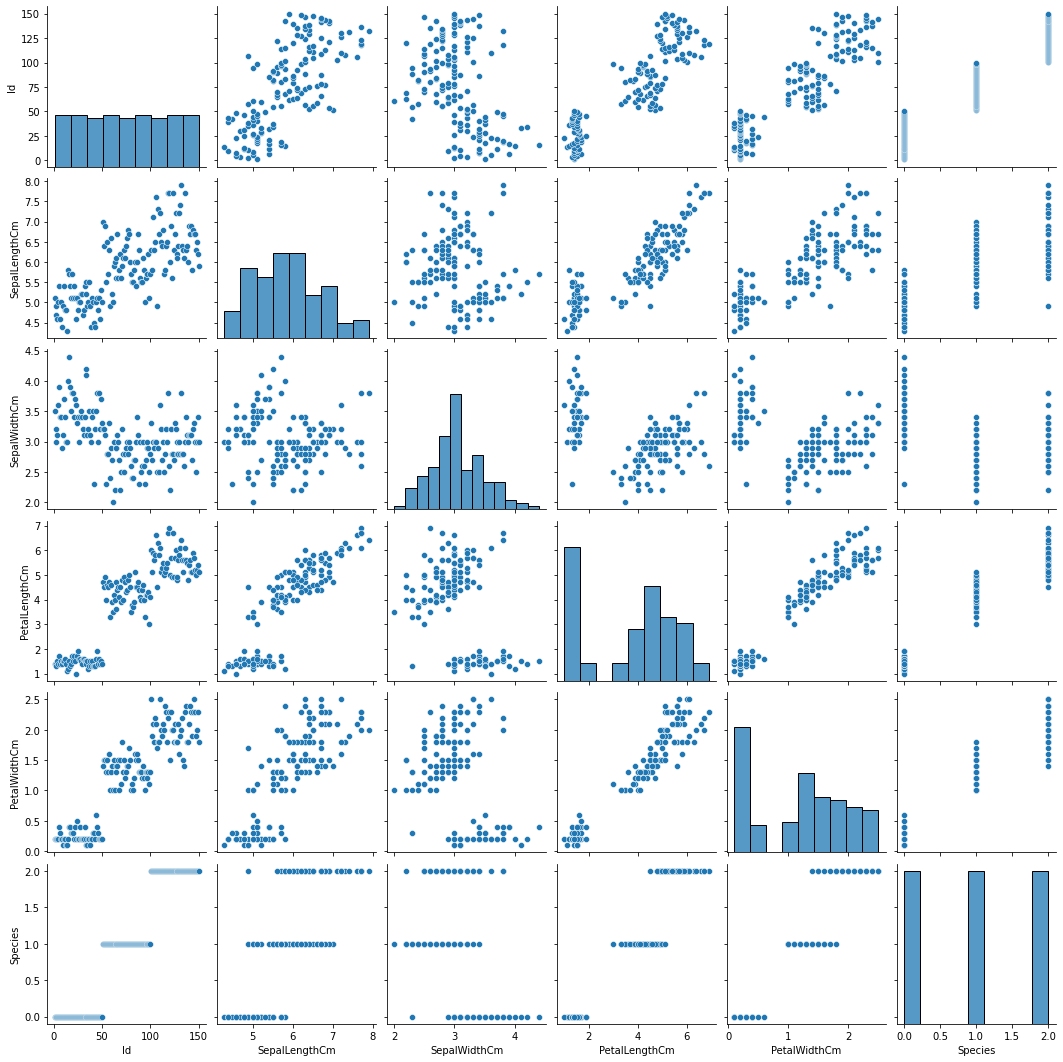

In [12]:
plt.figure(figsize = (30,30))
sns.pairplot(iris_df,kind = 'scatter')

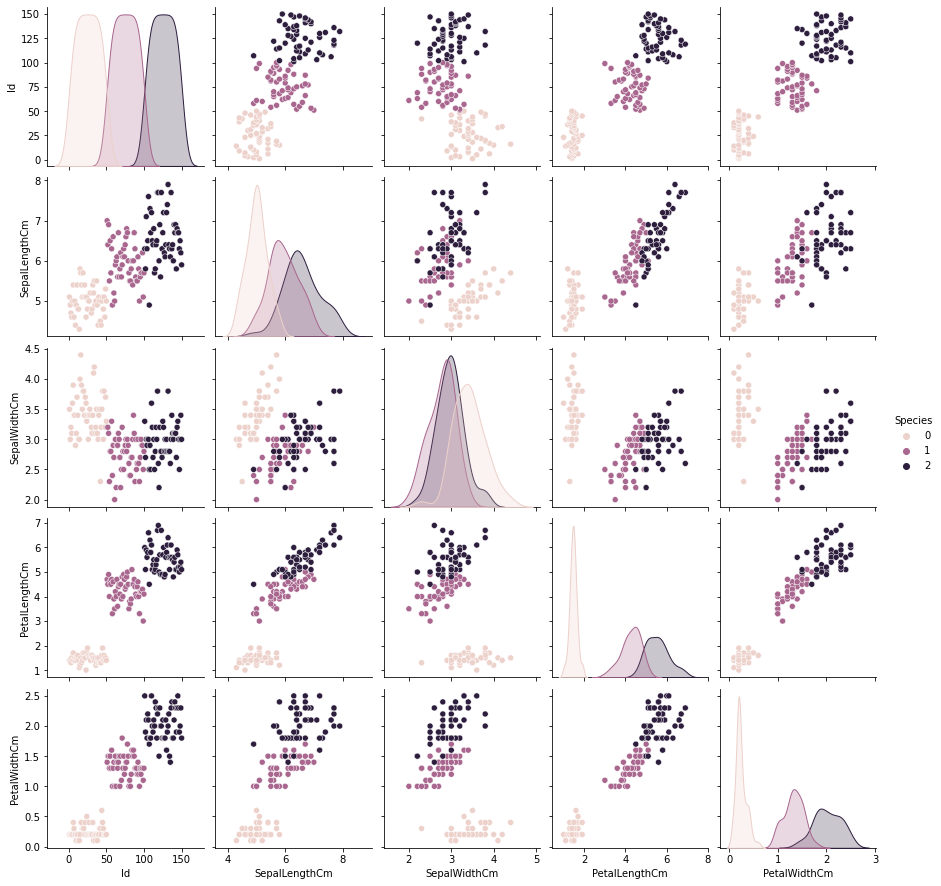

In [13]:
sns.pairplot(iris_df, kind = 'scatter', hue = 'Species')

In [14]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

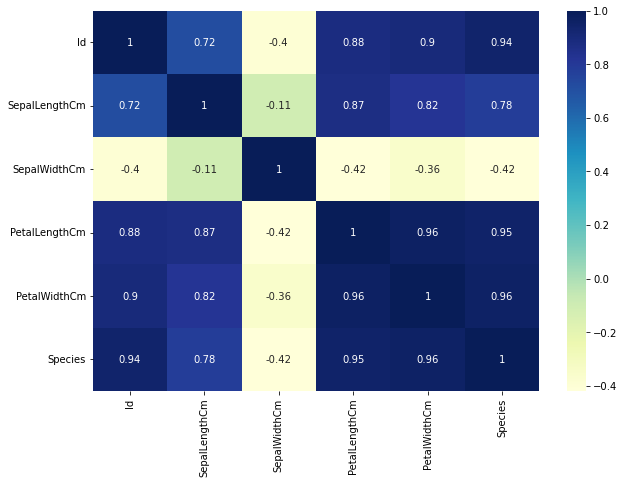

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(iris_df.corr(), annot = True, cmap = 'YlGnBu') 

<AxesSubplot:>

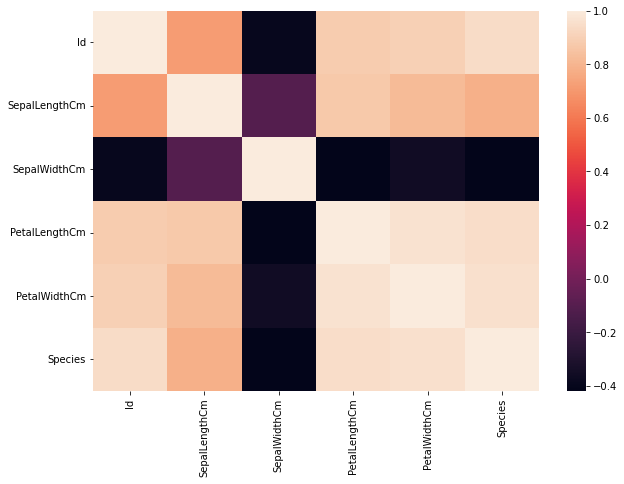

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(iris_df.corr(), annot = False)

# 4. Feature Engineering

# 5. Feature Selection

In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [18]:
iris_df.drop('Id', axis = 1, inplace = True)

In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 6. Model Training/Building

### 6.1 Splitting Dataset

In [20]:
x = iris_df.drop('SepalLengthCm', axis = 1)
y = iris_df['SepalLengthCm']

In [21]:
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [22]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,3.0,4.6,1.4,1
135,3.0,6.1,2.3,2
69,2.5,3.9,1.1,1
128,2.8,5.6,2.1,2
114,2.8,5.1,2.4,2
...,...,...,...,...
133,2.8,5.1,1.5,2
137,3.1,5.5,1.8,2
72,2.5,4.9,1.5,1
140,3.1,5.6,2.4,2


In [24]:
# 150 >> 120 (Training) + 30 (Testing)

### 6.2 Instantiating Linear Regression Model

In [25]:
model = LinearRegression()
model

LinearRegression()

### 6.3 Model Training

In [26]:
model.fit(x_train,y_train)

LinearRegression()

# 7. Model Evaluation

### 7.1 Predcition

In [27]:
y_pred_test = model.predict(x_test)
y_pred_test

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147,
       6.58803407, 6.08751945, 5.47306316, 4.97011483, 6.65064945,
       5.96358461, 5.36185069, 6.79865775, 6.40915979, 6.23704035,
       4.7172364 , 5.78471033, 6.2944135 , 4.90639933, 4.63294359,
       6.12188157, 6.2944135 , 6.62170856, 4.84227135, 7.13895033,
       5.93666494, 5.37526068, 5.18297641, 6.48950629, 5.84732571])

In [28]:
y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
56     6.3
141    6.9
44     5.1
29     4.7
120    6.9
94     5.6
5      5.4
102    7.1
51     6.4
78     6.0
42     4.4
92     5.8
66     5.6
31     5.4
35     5.0
90     5.5
84     5.4
77     6.7
40     5.0
125    7.2
99     5.7
33     5.5
19     5.1
73     6.1
146    6.3
Name: SepalLengthCm, dtype: float64

# MSE

In [29]:
MSE = mean_squared_error(y_test,y_pred_test)
print('Mean squared error is :', MSE)

Mean squared error is : 0.15781531046414649


In [30]:
MSE = mean_squared_error(y_pred_test,y_test)
print('Mean squared error is :', MSE)

Mean squared error is : 0.15781531046414649


# RMSE

In [31]:
rmse = np.sqrt(MSE)
print('Root Means Squared is :',rmse)

Root Means Squared is : 0.3972597518804875


# MAE

In [32]:
mean_absolute_error(y_pred_test,y_test)

0.3232781241570913

# R2Score

In [33]:
r2score = r2_score(y_pred_test,y_test)
r2score

0.7375923796161155

In [34]:
y_pred_test = model.predict(x_train)
y_pred_test

array([6.4257908 , 6.87307439, 5.69012886, 6.43103303, 5.86831551,
       5.17268776, 5.5655064 , 4.9162755 , 6.26396001, 6.56875268,
       6.46148652, 4.92656416, 5.86354423, 6.62965965, 6.41550214,
       7.31792428, 5.35156203, 5.0310218 , 4.63969842, 5.66362169,
       5.00056831, 4.88935584, 7.88490092, 6.43456686, 7.21970931,
       6.38394854, 5.89794403, 6.4768216 , 7.40533842, 6.18278854,
       5.08486112, 5.80024122, 5.92486369, 4.7338674 , 4.7172364 ,
       6.66728045, 4.86919101, 6.09698313, 6.28614607, 6.31457832,
       6.27383618, 6.61385362, 6.01269032, 5.31435371, 5.64938672,
       6.16262371, 6.60273999, 5.1167102 , 6.86673204, 5.68025269,
       5.17268776, 4.87553336, 5.44926484, 6.80219158, 4.6024901 ,
       6.58096642, 6.21495044, 6.26556875, 5.05794146, 4.97052731,
       6.02054527, 4.87553336, 6.94666606, 6.16262371, 7.38870742,
       6.11443911, 5.90267763, 6.51251732, 7.1231443 , 5.57257405,
       5.48013081, 5.75779067, 4.15379358, 5.54846291, 6.68895

In [35]:
y_train

91     6.1
135    7.7
69     5.6
128    6.4
114    5.8
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 120, dtype: float64

In [36]:
r2score = r2_score(y_pred_test,y_train)
r2score

0.8657147672803538

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=1)

x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
47,3.2,1.4,0.2,0
115,3.2,5.3,2.3,2
13,3.0,1.1,0.1,0
88,3.0,4.1,1.3,1
8,2.9,1.4,0.2,0
81,2.4,3.7,1.0,1
60,2.0,3.5,1.0,1
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
57,2.4,3.3,1.0,1


In [38]:
x_train.shape

(30, 4)

In [39]:
model = LinearRegression()
model

LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred_test = model.predict(x_test)
y_pred_test

array([5.13653095, 4.86171801, 6.30033692, 5.10933015, 7.74028221,
       6.69931333, 6.11393436, 5.55573006, 4.96472325, 6.68835454,
       5.96229935, 5.44960351, 6.77872995, 6.48929602, 6.29726563,
       4.70951823, 5.75228204, 6.36127576, 4.95941617, 4.62444989,
       6.09255539, 6.36127576, 6.73835845, 4.87741913, 7.06420706,
       5.94124114, 5.4346879 , 5.2395862 , 6.47578068, 5.74132324,
       6.4704736 , 6.90060763, 5.62733307, 6.39550467, 5.89777447,
       5.19970557, 5.53612214, 4.92260683, 6.31832383, 6.44599946,
       6.43845659, 4.96248747, 5.64581085, 6.53190331, 6.43059297,
       7.32511382, 5.40972288, 5.0506271 , 4.6424368 , 5.68296483,
       5.00767517, 4.90154863, 7.94722823, 6.41739839, 7.12738168,
       6.37137517, 5.78734646, 6.59318679, 7.35538591, 6.17845925,
       5.09274351, 5.71719373, 5.80840466, 4.69069581, 4.70951823,
       6.66953211, 4.89847733, 6.00043506, 6.250333  , 6.36434705,
       6.2815145 , 6.70410566, 5.91536672, 5.34878404, 5.54450

In [42]:
y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
      ... 
3      4.6
142    5.8
30     4.8
147    6.5
106    4.9
Name: SepalLengthCm, Length: 120, dtype: float64

In [43]:
r2score = r2_score(y_pred_test,y_test)
r2score

0.8152564163577228

In [44]:
y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
      ... 
3      4.6
142    5.8
30     4.8
147    6.5
106    4.9
Name: SepalLengthCm, Length: 120, dtype: float64

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

y_train

91     6.1
135    7.7
69     5.6
128    6.4
114    5.8
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 120, dtype: float64

In [46]:
model = LinearRegression()
model

LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred_train = model.predict(x_train)
y_pred_train

array([6.4257908 , 6.87307439, 5.69012886, 6.43103303, 5.86831551,
       5.17268776, 5.5655064 , 4.9162755 , 6.26396001, 6.56875268,
       6.46148652, 4.92656416, 5.86354423, 6.62965965, 6.41550214,
       7.31792428, 5.35156203, 5.0310218 , 4.63969842, 5.66362169,
       5.00056831, 4.88935584, 7.88490092, 6.43456686, 7.21970931,
       6.38394854, 5.89794403, 6.4768216 , 7.40533842, 6.18278854,
       5.08486112, 5.80024122, 5.92486369, 4.7338674 , 4.7172364 ,
       6.66728045, 4.86919101, 6.09698313, 6.28614607, 6.31457832,
       6.27383618, 6.61385362, 6.01269032, 5.31435371, 5.64938672,
       6.16262371, 6.60273999, 5.1167102 , 6.86673204, 5.68025269,
       5.17268776, 4.87553336, 5.44926484, 6.80219158, 4.6024901 ,
       6.58096642, 6.21495044, 6.26556875, 5.05794146, 4.97052731,
       6.02054527, 4.87553336, 6.94666606, 6.16262371, 7.38870742,
       6.11443911, 5.90267763, 6.51251732, 7.1231443 , 5.57257405,
       5.48013081, 5.75779067, 4.15379358, 5.54846291, 6.68895

In [49]:
y_train

91     6.1
135    7.7
69     5.6
128    6.4
114    5.8
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 120, dtype: float64

In [50]:
r2score = r2_score(y_pred_train,y_train)
r2score

0.8657147672803538

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=1)

y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
      ... 
3      4.6
142    5.8
30     4.8
147    6.5
106    4.9
Name: SepalLengthCm, Length: 120, dtype: float64

In [52]:
model = LinearRegression()
model

LinearRegression()

In [53]:
model.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred_train = model.predict(x_train)
y_pred_train

array([4.79458657, 6.34808118, 4.43549079, 6.0692614 , 4.60255617,
       5.41731576, 4.99113855, 4.98661697, 4.6665663 , 5.0770424 ,
       4.71035374, 6.10607074, 6.49153181, 5.00767517, 6.59542257,
       6.09031961, 5.8491947 , 6.68356221, 5.95441184, 5.17781185,
       4.83670298, 6.43639092, 5.8561728 , 6.81430912, 5.37519934,
       6.11493998, 6.57485523, 6.38149845, 6.51514656, 4.83977428])

In [55]:
r2score = r2_score(y_pred_train,y_train)
r2score

0.900679627625921

In [56]:
MSE = mean_squared_error(y_train,y_pred_train)
print('Mean squared error is :', MSE)

Mean squared error is : 0.05520808165107703
